In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Loading the dataset for Kyoto
kyoto = pd.read_csv('data/kyoto.csv')

In [3]:
# Loading the dataset for Liestal
liestal = pd.read_csv('data/liestal.csv')

In [4]:
# Loading the dataset for Washington DC
washingtondc = pd.read_csv('data/washingtondc.csv')

In [5]:
all_places = pd.concat([washingtondc, kyoto, liestal])

In [6]:
all_places.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,washingtondc,38.88535,-77.038628,0,1921,1921-03-20,79
1,washingtondc,38.88535,-77.038628,0,1922,1922-04-07,97
2,washingtondc,38.88535,-77.038628,0,1923,1923-04-09,99
3,washingtondc,38.88535,-77.038628,0,1924,1924-04-13,104
4,washingtondc,38.88535,-77.038628,0,1925,1925-03-27,86


In [7]:
all_places.tail()

,location,lat,long,alt,year,bloom_date,bloom_doy
123,liestal,47.4814,7.730519,350,2017,2017-03-26,85
124,liestal,47.4814,7.730519,350,2018,2018-04-08,98
125,liestal,47.4814,7.730519,350,2019,2019-03-27,86
126,liestal,47.4814,7.730519,350,2020,2020-03-17,77
127,liestal,47.4814,7.730519,350,2021,2021-03-28,87


In [8]:
all_places.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 127
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1062 non-null   object 
 1   lat         1062 non-null   float64
 2   long        1062 non-null   float64
 3   alt         1062 non-null   int64  
 4   year        1062 non-null   int64  
 5   bloom_date  1062 non-null   object 
 6   bloom_doy   1062 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 66.4+ KB


In [9]:
all_places.describe()

,lat,long,alt,year,bloom_doy
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,36.883259,100.025243,76.696798,1640.898305,103.036723
std,4.084265,70.781205,102.032042,319.594611,7.909810
min,35.011983,-77.038628,0.000000,812.000000,74.000000
25%,35.011983,135.676114,44.000000,1421.250000,98.000000
50%,35.011983,135.676114,44.000000,1713.500000,104.000000
75%,35.011983,135.676114,44.000000,1932.750000,108.000000
max,47.481400,135.676114,350.000000,2021.000000,124.000000


In [10]:
X = all_places.drop(['bloom_date', 'year'], axis=1)

In [11]:
X = pd.get_dummies(X, columns=['location'])

In [12]:
X = X.drop('bloom_doy', axis=1)

In [13]:
Y = all_places['bloom_doy']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [16]:
rmse_val = []

In [17]:
from sklearn import neighbors

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
for k in range(1, 20):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, test_predictions))
    rmse_val.append(error)
    
    print(f'The RMSE value for K = {k} is {error}')

c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid featur

The RMSE value for K = 1 is 7.4692682808985795
The RMSE value for K = 2 is 7.679666185927141
The RMSE value for K = 3 is 7.790289483731291
The RMSE value for K = 4 is 8.233323603190811
The RMSE value for K = 5 is 7.552150973465693
The RMSE value for K = 6 is 7.1645218048688815
The RMSE value for K = 7 is 7.252737466288858
The RMSE value for K = 8 is 7.035153696912737
The RMSE value for K = 9 is 7.009199309226494
The RMSE value for K = 10 is 7.1572485562925445
The RMSE value for K = 11 is 7.187865179559891
The RMSE value for K = 12 is 7.029369088372317
The RMSE value for K = 13 is 7.163679388922143
The RMSE value for K = 14 is 7.126708121709322
The RMSE value for K = 15 is 7.174557392076867
The RMSE value for K = 16 is 7.168584555256503
The RMSE value for K = 17 is 7.153548760068417
The RMSE value for K = 18 is 7.322626177487277
The RMSE value for K = 19 is 7.455216288970725


c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


<AxesSubplot:>

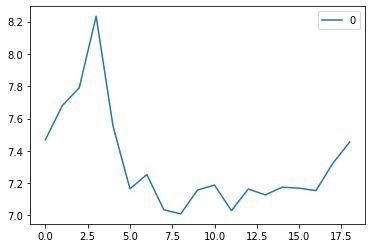

In [20]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

In [23]:
knn = neighbors.KNeighborsRegressor()

In [24]:
model = GridSearchCV(knn, params, cv=5)

In [25]:
model.fit(X_train, y_train)

c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid featur

c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid featur

c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid featur

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20]})

In [26]:
model.best_estimator_

KNeighborsRegressor(n_neighbors=14)

In [27]:
model.best_params_

{'n_neighbors': 14}

In [28]:
model = neighbors.KNeighborsRegressor(n_neighbors=14)
    
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [29]:
RMSE

7.126708121709322

In [30]:
model.predict([[38.0113, 136.8848, 45, 0, 1, 0], [37.1348, 140.7890, 42, 1, 0, 0], 
                  [46.1345, 120.7890, 82, 0, 0, 1]]).round().astype(int)

c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([103, 104, 103])

In [31]:
test_predictions = [round(pred) for pred in test_predictions]
avg_no_of_days = round(np.mean(test_predictions))

In [32]:
avg_no_of_days

103

In [33]:
print('The earliest predicted blossom date: ', min(test_predictions))

The earliest predicted blossom date:  93


In [34]:
print('The latest predicted blossom date: ', max(test_predictions))

The latest predicted blossom date:  104


In [1]:
predict_data = [[38.0113, 136.8848, 45, 0, 1, 0], [37.1348, 140.7890, 42, 1, 0, 0], 
                  [46.1345, 120.7890, 82, 0, 0, 1]]
locations = ['Kyoto', 'Washington DC', 'Liestal']

In [37]:
predicted_data = model.predict([[38.0113, 136.8848, 45, 0, 1, 0], [37.1348, 140.7890, 42, 1, 0, 0], 
                  [46.1345, 120.7890, 82, 0, 0, 1]]).round().astype(int)

c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\users\shriram\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [39]:
for i in range(1, 4):
    print('For latitude', predict_data[i - 1][0], 'longitude', predict_data[i - 1][1], 'and location', locations[i - 1], 'The predicted blossom date will be', predicted_data[i - 1])
    print()

For latitude 38.0113 longitude 136.8848 and location Kyoto The predicted blossom date will be 103

For latitude 37.1348 longitude 140.789 and location Washington DC The predicted blossom date will be 104

For latitude 46.1345 longitude 120.789 and location Liestal The predicted blossom date will be 103

